In [1]:
import os
import api

# 预处理

### json读取

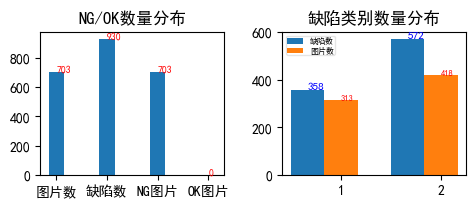

In [10]:
jf = r"D:\project\pad_before\train\images\NG119\remove_empty.json"
api.read_json_api(jf)

## 现场采集标注重命名

### 按类别采集

<p style="color:#409EFF;font-weight:bold">现场按工艺类别采集，每个文件夹以工艺命名<br />类别名必须改成英文(e.g.开裂 -> KL),一个文件夹只有一个标注</p>

In [20]:
img_path = r"\\Ds418\NAS5\A-PAD-new\ann_data\20230512"
dst = img_path
api.rename_classify_folder_api(img_path, dst, start="PAD_1L_0512_NG_")

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 12.75it/s]

 [INFO]--> 2023-05-13 15:37:18:success save json: \\Ds418\NAS5\A-PAD-new\ann_data\20230512\rename_classify.json 


### 按产品号采集

<p style="color:#409EFF;font-weight:bold">现场按照产品号采集，每个产品号文件夹有n张图片和1个json</p> 

In [ ]:
img_path = r"\\Ds418\NAS5\A-PAD-new\ann_data\20230511\新建文件夹"
dst = img_path
api.rename_product_folder_api(img_path, dst, start="laptop_C1_1105_1_CJ_")

### 单文件夹采集

<p style="color:#409EFF;font-weight:bold">最常用的采集方式,只有1个文件夹,里面有n张图片和1个json</p>

In [158]:
jf = r"D:\pad_before\addng\ce\ng.json"
img_path = os.path.dirname(jf)
dst = r"D:\pad_before\addng"
api.rename_one_folder_api(img_path, jf, dst,start="PAD_2B_0525_outer_PICK_NG_")

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 46.44it/s]

 [INFO]--> 2023-05-26 10:23:14:success save json: D:\pad_before\addng\rename_one_folder.json 


### 纠正中文名错误

In [5]:
img_path = r"\\Ds418\NAS3\A-ZK-4\raw_data\20230627\0626白数据\自检4_83_4G蓝色\缺陷图\检出"
jf = r"\\Ds418\NAS3\A-ZK-4\raw_data\20230627\0626白数据\自检4_83_4G蓝色\缺陷图\检出\via_export_json - 2023-06-26T195128.904.json"
dst = img_path+"_out"
api.correct_img_json_api(img_path,jf,dst)

 [INFO]--> 2023-07-01 10:31:19:success save json: \\Ds418\NAS3\A-ZK-4\raw_data\20230627\0626白数据\自检4_83_4G蓝色\缺陷图\检出_out\correct_name.json 


## OK图重命名

### 重命名图片

In [160]:
img_path = r"D:\pad_before\addok\zhu"
dst = img_path
api.rename_img_api(img_path, dst, start="PAD_2B_0525_inner_PICK_OK_")

100%|██████████████████████████████████████████████████████████████████████████████| 208/208 [00:00<00:00, 2273.91it/s]


### 重命名图片+生成标注

<p style="color:#409EFF;font-weight:bold">常用于负样本生成</p>

In [6]:
img_path = r"C:\Users\lubin\Desktop\images"
dst = img_path
api.rename_img_json_api(img_path,dst, start="")#PAD_B_0109_OK_PAD_2B_0511_PICK_inner_OK_

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 33.14it/s]


 [INFO]--> 2023-06-01 11:44:58:success save json: C:\Users\lubin\Desktop\images\ok-pcs.json 


## JSON操作

### json合并

In [173]:
jf_path = r"D:\pad_before\train\del"
api.merge_json_api(jf_path)

 [INFO]--> 2023-05-26 13:57:00:success save json: D:\pad_before\train\del\data_merge.json 


### json覆盖

In [9]:
old_jf = r"C:\Users\lubin\Desktop\1\data_merge.json"
new_jf = r"C:\Users\lubin\Desktop\1\via_to_json.json"
dst = os.path.dirname(old_jf)
api.json_cover_api(old_jf, new_jf,dst)

 [INFO]--> 2023-05-12 18:20:36:success save json: C:\Users\lubin\Desktop\1\data_cover.json 


### json删除小面积

In [ ]:
jf_path = r
api.del_small_area_api(jf_path, min_area=50)

### json筛选类别

In [6]:
jf = r"D:\project\pad_before\train\images\NG\ng.json"
api.filter_labels_api(jf, labels=[1,19])#8,10,11,12,13,14,15 1,2,3,4,5,7,13,14    17,18,19

 [INFO]--> 2023-06-29 19:04:14:success save json: D:\project\pad_before\train\images\NG\filter_labels.json 


### json删除空值

In [8]:
import api
jf = r"D:\project\pad_before\train\images\NG\filter_labels.json"
api.del_empty_key_api(jf)

 [INFO]--> 2023-06-29 19:05:19:success save json: D:\project\pad_before\train\images\NG\remove_empty.json 


### 分段标注

<p style="color:#409EFF;font-weight:bold">将json中长宽比大于limit_rate的标注分段</p>

In [10]:
import api
jf = r"C:\Users\lubin\Desktop\line\filter_json.json"
img_path = os.path.dirname(jf)
limit_rate=13  # 限制长宽比
api.split_limit_mask_api(img_path, jf,limit_rate)

100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:05<00:00, 12.10it/s]


 [INFO]--> 2023-03-30 14:47:17:success save json: C:\Users\lubin\Desktop\line\split_mask.json 


### json 复制

<p style="color:#409EFF;font-weight:bold">确保一个文件夹中的图片都是一个点位，及只包含一张图片的json</p>

In [ ]:
jf = r"D:\PAD\222\via_export_json (7).json"
img_path = os.path.dirname(jf)
api.copy_via_api(jf,img_path)

### json 映射复制

<p style="color:#409EFF;font-weight:bold">映射json需包含所需点位的标注信息,标签可以默认全为1</p>

In [5]:
jf = r"D:\PAD\sel_img1\ann_7.json"
img_path = os.path.dirname(jf)
api.match_point_json_api(jf,img_path)

 [ERROR]--> D:\code\AdiTool\dpp\dataset\preprocessing\json_operate.py:238 2023-03-03 10:05 点位提取失败，请检查图片名 OQC_flow_20230301_silver_2_OK104_0124_729-1_1_12.jpg,或检查映射json有无该点位标注 
 [ERROR]--> D:\code\AdiTool\dpp\dataset\preprocessing\json_operate.py:238 2023-03-03 10:05 点位提取失败，请检查图片名 OQC_flow_20230301_silver_2_OK104_0250_730-1_1_17.jpg,或检查映射json有无该点位标注 
 [ERROR]--> D:\code\AdiTool\dpp\dataset\preprocessing\json_operate.py:238 2023-03-03 10:05 点位提取失败，请检查图片名 OQC_flow_20230301_silver_2_OK104_0922_735-3_1_1.jpg,或检查映射json有无该点位标注 
 [ERROR]--> D:\code\AdiTool\dpp\dataset\preprocessing\json_operate.py:238 2023-03-03 10:05 点位提取失败，请检查图片名 OQC_flow_20230301_silver_2_OK104_1185_737-3_1_9.jpg,或检查映射json有无该点位标注 
 [ERROR]--> D:\code\AdiTool\dpp\dataset\preprocessing\json_operate.py:238 2023-03-03 10:05 点位提取失败，请检查图片名 OQC_flow_20230301_silver_2_OK104_1212_738-1_1_11.jpg,或检查映射json有无该点位标注 
 [ERROR]--> D:\code\AdiTool\dpp\dataset\preprocessing\json_operate.py:238 2023-03-03 10:05 点位提取失败，请检查图片名 OQC_flow_20230301

KeyError: 'regions'

## json格式转换

### json => via

In [38]:
jf = r"D:\pad_before\train\add\zhu\remove_empty.json"
img_path = os.path.dirname(jf)
api.json_to_via_api(img_path, jf)

 [INFO]--> 2023-05-22 17:33:03:success save json: D:\pad_before\train\add\zhu\json_to_via.json 


### via => json

<p style="color:#409EFF;font-weight:bold">VIA标注软件格式去除后缀</p>

In [36]:
jf = r"D:\pad_before\train\add\via_export_json (3).json"
api.via_to_json_api(jf)

 [INFO]--> 2023-05-22 17:23:34:success save json: D:\pad_before\train\add\via_to_json.json 


### json => yolo

In [3]:
jf = r"D:\project\pad_before\train\images\NG119\images\test\filter_json.json"
img_path = os.path.dirname(jf)
dst = os.path.dirname(img_path)+"\labels"
api.json_to_yolo_api(img_path, jf, dst,seg=True)

100%|████████████████████████████████████████████████████████████████████████████████| 175/175 [00:08<00:00, 20.10it/s]


## 绘制标注

<div>
<div style="float:left">
  <table border="2" cellspacing="10">
    <tr>
        <th align="left">参数名</th> 
        <th align="left">参数值</th> 
        <th align="left">参数说明</th> 
    </tr>
    <tr>
    <td align="left" rowspan="2"><b>shape</b></td>
      <td align="center">POLYGON</td>
      <td align="left">多边形</td> 
    </tr>
    <tr>
      <td align="center">RECT</td>
      <td align="left">矩形</td> 
    </tr>
    <tr>
      <td align="left" rowspan="2"><b>color</b></td>
      <td align="center">False</td>
      <td align="left">默认标注json绿色，推理json红色</td> 
    </tr>
    <tr>
      <td align="center">(255,0,0)</td>
      <td align="left">颜色信息</td> 
    </tr>
    <tr>
      <td align="left" rowspan="2"><b>classid</b></td>
      <td align="center">False</td>
      <td align="left">默认全标签</td> 
    </tr>
    <tr>
      <td align="center">[1,2]</td>
      <td align="left">绘制id列表</td> 
    </tr>
  </table>
</div>

<div style="margin-left:10px"> 
  <table border="2" cellspacing="10" >
    <tr>
        <th align="left">参数名</th> 
        <th align="left">参数值</th> 
        <th align="left">参数说明</th> 
    </tr>
    <tr>
      <td align="left" ><b>label</b></td>
      <td align="center">False/True</td>
      <td align="left">标签</td> 
    </tr>
    <tr>
      <td align="left"><b>score</b></td>
      <td align="center">False/True</td> 
      <td align="left">得分</td> 
    </tr>
    <tr>
      <td align="left"><b>area</b></td>
      <td align="center">False/True</td> 
      <td align="left">面积</td> 
    </tr>
    <tr>
      <td align="left"><b>font_size</b></td>
      <td align="center">INT</td> 
      <td align="left">字体大小</td> 
    </tr>  
  </table>
</div>
</div>

In [7]:
import api
jf = r"C:\Users\lubin\Desktop\images\0522\Jmodel_0459999.json.json"
inf_jf = r"C:\Users\lubin\Desktop\images\0522\Jmodel_0461999.json.json"
img_path = r"C:\Users\lubin\Desktop\images\0522"
dst = img_path+"_rect"
draw_cfg_list = [{"shape":"RECT","label":True,"score":False,"area":False,"color":(0,255,0),"font_size":1,"classid":False},
                 {"shape":"POLYGON","label":True,"score":False,"area":False,"color":(0,0,255),"font_size":1,"classid":False}]
api.draw_mask_api(img_path, jfs=[jf,inf_jf], draw_cfg_list=draw_cfg_list,dst=dst, spotcheck=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 27.14it/s]


## 移动筛选

### 根据图片过滤json

In [170]:
jf = r"D:\pad_before\train\images\NG\via_to_json.json"
img_path = r"D:\pad_before\train\images\NG\2"
dst = img_path
api.filter_json_by_img_api(img_path,jf,dst)

 [INFO]--> 2023-05-26 13:51:22:success save json: D:\pad_before\train\images\NG\2\filter_json.json 


### 根据json筛选图片

In [9]:
jf = r"D:\project\pad_before\train\images\NG\remove_empty.json"
img_path = os.path.dirname(jf)
dst = r"D:\project\pad_before\train\images\NG119"
api.move_img_by_json_api(img_path, jf, dst, move="copy")  # "move" | "copy"

### 切分ng/ok图

<p style="color:#409EFF;font-weight:bold">img_path为空时只会切分为ng.json/ok.json <br/>img_path不为空时会将图片也切分NG/OK文件夹</p>

In [4]:
jf = r"D:\project\pad_before\train\images\data_merge.json"
img_path = os.path.dirname(jf)
api.split_ng_ok_api(img_path, jf)

 [INFO]--> 2023-06-25 10:13:53:success save json: D:\project\pad_before\train\images\ng.json 
 [INFO]--> 2023-06-25 10:13:54:success save json: D:\project\pad_before\train\images\ok.json 


### 筛选jpg对应的bmp图

In [ ]:
jpg_path = r""
img_path = r""
dst = jpg_path
api.move_bmp_by_jpg_api(jpg_path,img_path,dst)

## 图像处理

### 分割

<p style="color:#409EFF;font-weight:bold">相关参数路径：dpp/dataset/transforms/config.yaml</p>
<div style="float:left">
    <table border="2" cellspacing="0">
        <tr>
          <th align="left">分割方式</th>
          <th align="left"></th>
          <th align="left">config.yaml参数说明</th>
        </tr>
        <tr>
          <td align="left" rowspan="2">AvgSeg</td>
          <td align="center" rowspan="2">等比分割</td>
          <td align="left">crop_size：均分大小</td> 
        </tr>
        <tr>
          <td align="left">extra：FILL(填充), DROP(丢弃),KEEP(保留)</td> 
        </tr>
        <tr>
          <td align="left">JsonSeg</td>
          <td align="center">软件配置文件分割</td>
          <td align="left">jfs：软件每个工位配置文件json</td>
        </tr>
        <tr>
          <td align="left">CeSeg</td>
          <td align="center">3工位侧面相机分割</td>
          <td align="left">start,end：自定义起始分割位置</td>
        </tr>
        <tr>
          <td align="left">Cv2Seg</td>
          <td align="center">边缘提取</td>
          <td align="left">二值化，卷积等参数</td>
        </tr>
        <tr>
          <td align="left">ThreeSeg</td>
          <td align="center">后盖3工位3000*4096分割</td>
          <td align="left">参数固定</td>
        </tr>
    </table>
</div>

In [128]:
import api,os
jf = r"D:\pad_before\addok\polygon.json"
src = os.path.dirname(jf)
jf = None
dst = src+"_segment"
api.img_segment_api("AvgSeg", src, jf, dst)

100%|████████████████████████████████████████████████████████████████████████████████| 156/156 [00:13<00:00, 11.85it/s]

 [INFO]--> 2023-05-24 21:15:46:success save json: D:\pad_before\addok_segment\segment.json 


### 合并

<p style="color:#409EFF;font-weight:bold"> 由于同一批数据会多次执行,dst要以 "_xx" 命名,新生成的图片名会以 "_" 后的名称添加后缀</p>
<div style="float:left">
    <table border="2" cellspacing="30">
        <tr>
          <th align="left">合并方式</th>
        </tr>
        <tr>
          <td align="left">AvgMerge</td>
          <td align="center">均匀合并</td>
        </tr>
        <tr>
          <td align="left">ZkMerge</td>
          <td align="center">宽度上合并</td>
        </tr>
    </table>
</div>

In [4]:
import api,os
jf = r"D:\pad_before\21_rect\OK_aug1_segment\aug.json"
src = os.path.dirname(jf)
jf = None
dst = src+"_m0"
api.img_merge_api("ZkMerge", src, jf, dst,size=2048) 

 [INFO]--> 2023-05-12 14:27:33:success save json: D:\pad_before\21_rect\OK_aug1_segment_m0\merge.json 


### 图像增强

<p style="color:#409EFF;font-weight:bold"> 由于同一批数据会多次执行,dst要以 "_xx" 命名,新生成的图片名会以 "_" 后的名称添加后缀</p>

In [6]:
from dpp.dataset.transforms.augmentation import *
tfms = [
        # HFlipTransform(),
        # VFlipTransform(),
        # HVFlipTransform(),
        # ConstrastTransform((1, 1.5)),
        # BrightnessTransform((0.5, 1)),
        RotationTransform(-90),
        # ScaleTransform((0.5, 0.5))
        ]
jf = r"D:\pad_before\21_rect\OK_aug1_segment_m0\merge.json"
img_path = os.path.dirname(jf)
dst = img_path+"_aug1"
api.img_aug_api(img_path, jf, dst, tfms)

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 18.43it/s]

 [INFO]--> 2023-05-12 14:33:29:success save json: D:\pad_before\21_rect\OK_aug1_segment_m0_aug1\aug.json 


### 背景置黑裁剪

<div style="float:left">
    <table border="2" cellspacing="30">
        <tr>
          <td align="left">multi</td>
          <td align="center">True: 一张图上n个缺陷各自置黑,生成n张原图</br>False: 一张图上n个缺陷以外全部置黑,生成1张原图</td>
        </tr>
        <tr>
          <td align="left">crop</td>
          <td align="center">置黑后是否裁剪小图</td>
        </tr>
        <tr>
          <td align="left">pad</td>
          <td align="center">小图填充数值(四周填充)</br>float: 小图宽高*比值；填充大小</br>int: 具体填充大小</td>
        </tr>
    </table>
</div>

In [3]:
jf = r"D:\PAD\line\images\val\ng.json"
img_path = os.path.dirname(jf)
dst = img_path+"_fill2"
api.fill_crop_via_api(img_path,jf,dst,multi=False,crop=True,pad=0.5)

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [01:11<00:00,  2.05s/it]


 [INFO]--> 2023-03-02 09:33:14:success save json: D:\PAD\line\images\val_fill2/crop\crop.json 


### 多区域置黑

<p style="color:#409EFF;font-weight:bold">将标注以外区域置黑，包含检测区非检测区，以标签id区分；</br>可配合产品套图点位json<接口：json 映射复制>快速生成，再适当调整标注</p>

In [ ]:
jf = r"D:\PAD\sel_img1\ann_7.json"
img_path = os.path.dirname(jf)
dst = img_path+"_fill"
api.fill_crop_multi_api(img_path,jf,dst)

###  中框矩形框外置黑或裁剪

<p style="color:#409EFF;font-weight:bold">适用于中框，PAD，笔电侧面成像背景区域置黑；只支持单个矩形框</p>

In [ ]:
rect_jf = r"C:\Users\lubin\Downloads\via_export_json (6).json"
img_path = r"C:\Users\lubin\Desktop\images"
offset = 0
dst = img_path+"_fill"
api.fill_rect_api(img_path,dst,rect_jf)

### 裁剪矩形框

In [ ]:
mask_jf = r"C:\Users\lubin\Downloads\via_export_json (7).json"
rect_jf = r"C:\Users\lubin\Downloads\via_export_json (6).json"
img_path = r"C:\Users\lubin\Desktop\images"
offset = 20
dst = img_path+"_fill"
api.crop_rect_api(img_path,dst,rect_jf,mask_jf,offset)

### 填充矩形框

In [ ]:
img_path = 
jf = 
dst = 
api.fill_crop_multi_api(img_path,jf,dst):

### 图像填充

In [3]:
img_path = r"D:\PAD\ok\s2_merge\fill"
dst = img_path+"_fill"
pad_size=(2048,2048)
api.img_pad_api(img_path, dst,pad_size)

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:06<00:00, 23.36it/s]


### 格式/灰度转换

<div style="float:left">
    <table border="2" cellspacing="30">
        <tr>
          <th align="left">color</th>
        </tr>
        <tr>
          <td align="left">J2B</td>
          <td align="center">jpg->bmp</td>
        </tr>
        <tr>
          <td align="left">B2J</td>
          <td align="center">bmp->jpg</td>
        </tr>
        <tr>
          <td align="left">B2B</td>
          <td align="center">bmp->bmp</td>
        </tr>
        <tr>
          <td align="left">J2J</td>
          <td align="center">jpg->jpg</td>
        </tr>
    </table>
</div>
<div style="float:left; margin-left:50px">
    <table border="2" cellspacing="30">
        <tr>
          <th align="left">out_channel</th>
        </tr>
        <tr>
          <td align="left">3</td>
          <td align="center">灰度图</td>
        </tr>
        <tr>
          <td align="left">1</td>
          <td align="center">彩色图</td>
        </tr>
    </table>
</div>

In [7]:
img_path = r"C:\Users\lubin\Desktop\0506\c1_merge_rect\2_segment"
dst = img_path
color = "J2J"   
out_channel = 3
api.convert_format_api(img_path, dst, color, out_channel)

100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:05<00:00, 14.27it/s]


## 图像分类

### 按类别裁切小图

<p style="color:#409EFF;font-weight:bold">根据 json标签生成以标签命名的文件夹，每个文件夹保存相应类别小图</p>
<div style="float:left">
    <table>
    <tr>
        <th>参数</th>
    <tr/>
    <tr>
        <td align="left"><b>scale</b></td> 
        <td align="center">False</td>
        <td align="left" rowspan="2">GT_BOX偏移offset裁剪<br>输出大小与缺陷本身大小接近,长宽比偏大时不清晰</td>
    </tr>
    <tr>
        <td align="left"><b>offset</b></td>
        <td align="center">50</td> 
    </tr>
    </table>
</div>
<div style="margin-left:20px">
    <table>
    <tr>
        <th>参数</th>
    <tr/>
    <tr>
        <td align="left"><b>scale</b></td> 
        <td align="center">True</td>
        <td align="left" rowspan="2">以crop_size的倍数裁剪缺陷<br>输出缺陷总体比列接近,含有的背景更多</td>
    </tr>
    <tr>
        <td align="left"><b>crop_size</b></td>
        <td align="center">120</td> 
    </tr>
    </table>
</div>

In [5]:
jf = r"D:\project\pad_before\train\images\NG\ng.json"
img_path = os.path.dirname(jf)
dst = img_path+"_classify"
api.crop_small_img_api(img_path, jf, dst, scale=True,offset=0,crop_size=256)

100%|██████████████████████████████████████████████████████████████████████████████| 4100/4100 [09:39<00:00,  7.07it/s]


### 按类别裁切小图+json

In [3]:
jf = r"D:\project\pad_before\train\images\NG\ng.json"
img_path = os.path.dirname(jf)
dst = img_path+"_classify1"
api.crop_small_img_json_api(img_path, jf, dst, scale=True,offset=0, crop_size=256)

100%|██████████████████████████████████████████████████████████████████████████████| 4100/4100 [08:54<00:00,  7.67it/s]


 [INFO]--> 2023-06-25 14:24:51:success save json: D:\project\pad_before\train\images\NG_classify1\crop_img.json 


### 按类别小图生成JSON

<p style="color:#409EFF;font-weight:bold">手动调整各个类别文件夹中小图后,生成分类后的json</p>
<p style="color:red;font-weight:bold">可手动创建 <i>mark</i>,<i>del</i> 两个文件夹用于挑选需要重新标注和需要删除的原图</p>

In [44]:
img_path = r"D:\pad_before\train\images_classify"
jf = r"D:\pad_before\train\images\NG\ng.json"
dst = os.path.dirname(jf)
api.classify_json_api(img_path,jf,dst)

100%|█████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 539.28it/s]


 [INFO]--> 2023-05-22 20:40:47:success save json: D:\pad_before\train\images\NG\reclassify.json 


### 机器学习分类

## 训练相关

### 计算数据集均值方差

In [4]:
img_path = r"D:\project\pad_before\train\images\NG_classify1\19"
channel = 3   # 通道
api.cal_mean_std_api(img_path,channel)

100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:01<00:00, 440.16it/s]

image length : 572
cfg.MODEL.PIXEL_MEAN = [117.99, 117.99, 117.99]
cfg.MODEL.PIXEL_STD = [31.35, 31.35, 31.35]


### 生成COCO

In [ ]:
jf = r"D:\val\32m\ng.json"
img_path = os.path.dirname(jf)
dst = os.path.dirname(img_path)+'/annotations'
api.save_coco_api(img_path, jf, dst)

### 生成npz


python prepare_npz.py --dataset-name ./

### 训练脚本

python train.py --num-gpus 2 --dist-url auto

## 现场数据操作

### 合并量跑原始数据

<p style="color:#409EFF;font-weight:bold">合并机台套图ORIG/NG/OK/Splice;名称为产品号-图片名(1-1_1_3.bmp)</p>

In [ ]:
img_path = r"\\Ds418\NAS3\A-PAD\raw_data\20230227\2-24\2-24-待检品量跑套图54"
dst = r"D:\PAD\jpg"
result = "ORIG" # NG OK Splice ORIG
api.move_img_by_product_api(img_path,dst,result)

### 筛选机台NG数据

<p style="color:#409EFF;font-weight:bold">筛选机台NG/OK结果图及原图</p>

In [ ]:
import api
img_path = r"\\TEST03slave\ipad\BackPlaneA\01-code\BackPlaneA\x64\Release\Data\X12\Image\272\0220"
dst = r"C:\Users\lubin\Desktop\gpus\ng"
result = "NG" # NG OK 
api.move_img_by_result_api(img_path,dst,result)

### 现场命名纠正

<p style="color:#409EFF;font-weight:bold">中文及下划线中划线修复</p>
<div style="float:left; margin-left:50px">
    <table border="2" cellspacing="30">
        <tr>
          <td align="left">jf</td>
          <td align="center">json不需修改时为None</td>
        </tr>
        <tr>
          <td align="left">start</td>
          <td align="center">前缀：部分图片中含有固定批次加下划线名称的前缀</br>例：352_168_1_1_2.bmp中352表示批次，168表示产品号，所以start为352_</td>
        </tr>
    </table>
</div>

In [ ]:
img_path = r""
jf = None
dst = r""
start = ""
api.check_filename_api(img_path,jf,dst,start):

### 根据结果图排列=>原图

<p style="color:#409EFF;font-weight:bold">适用于机台NG结果图数据分类后；原图按照结果图分类</p>

In [9]:
result_path = r"\\Ds418\NAS3\A-PAD-new\ann_data\20230323_rect\submit"
dst = r"\\Ds418\NAS3\A-PAD-new\ann_data\20230323"
api.arrange_img_by_result(result_path,dst)

FileNotFoundError: [Errno 2] No such file or directory: '\\\\Ds418\\NAS3\\A-PAD-new\\ann_data\\20230323\\PAD_1L_0323_NG_CJ_1-1_1_8.bmp'

分析训练数据集，生成数据分析报告

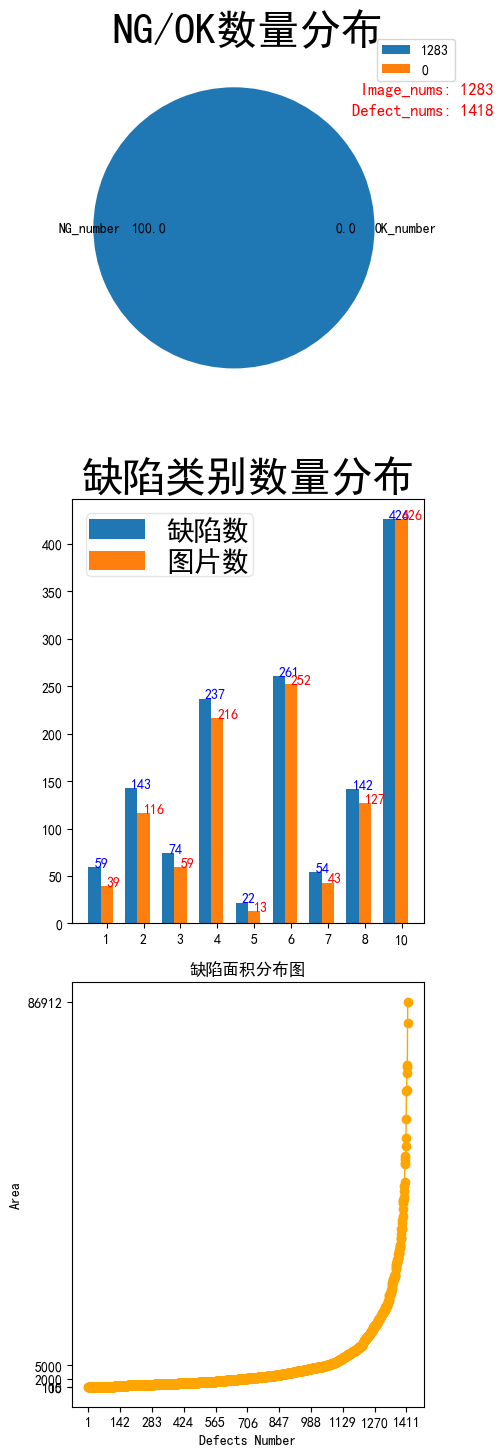

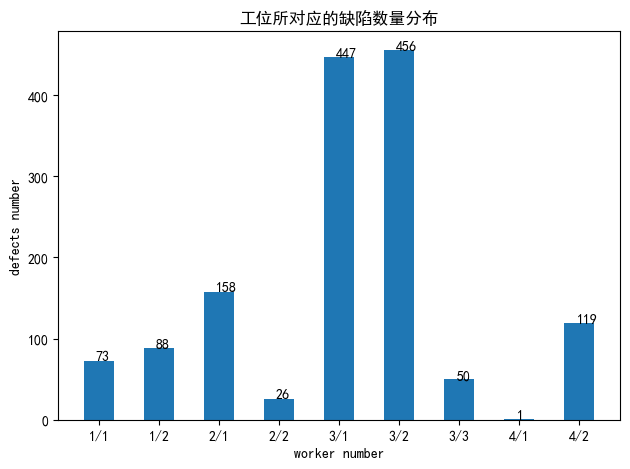

In [8]:
from api import read_json_analysis_api
jf = r"D:\20230602\test_image_3\data_merge.json"
dst = './/image' #报告保存路径
read_json_analysis_api(jf, dst=dst)